# Sample cuts for CSP2

In [1]:
import snpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import glob

%config InlineBackend.figure_format = 'retina'
print(f'SNooPy version: v{snpy.__version__}')

SNOOPY_MODEL = 'max_model'

SNooPy version: v2.6.0


___

In [2]:
def save_csp2_output(sn):
    """Creates a SNooPy input file from previously saved objects.
    
    Parameters
    ==========
    sn: SNooPy object
        SN in a SNooPy object.
    """
    
    with open(f'csp2/{sn.name}_snpy.txt', 'w') as sn_output:
        line = f'{sn.name} {sn.z:.4f} {sn.ra:.4f} {sn.decl:.4f}\n'
        sn_output.write(line)

        for filt in sn.allbands():
            filt_info = sn.data[filt]
            if 'J' in filt:
                filt = 'Jd'
            if 'H' in filt:
                filt = 'Hd'
            sn_output.write(f'filter {filt}\n')

            for mjd, mag, mag_err in zip(filt_info.MJD, 
                                         filt_info.mag,
                                        filt_info.e_mag):
                line = f' {mjd:.3f} {mag:.3f} {mag_err:.3f}\n'
                sn_output.write(line)

In [3]:
csp2_files = glob.glob('ChrisBurns/cspII/*')

for file in csp2_files:
    sn = snpy.get_sn(file)
    save_csp2_output(sn)

Error:  could not load pickle file csp2/LSQ12hzj_snpy.txt


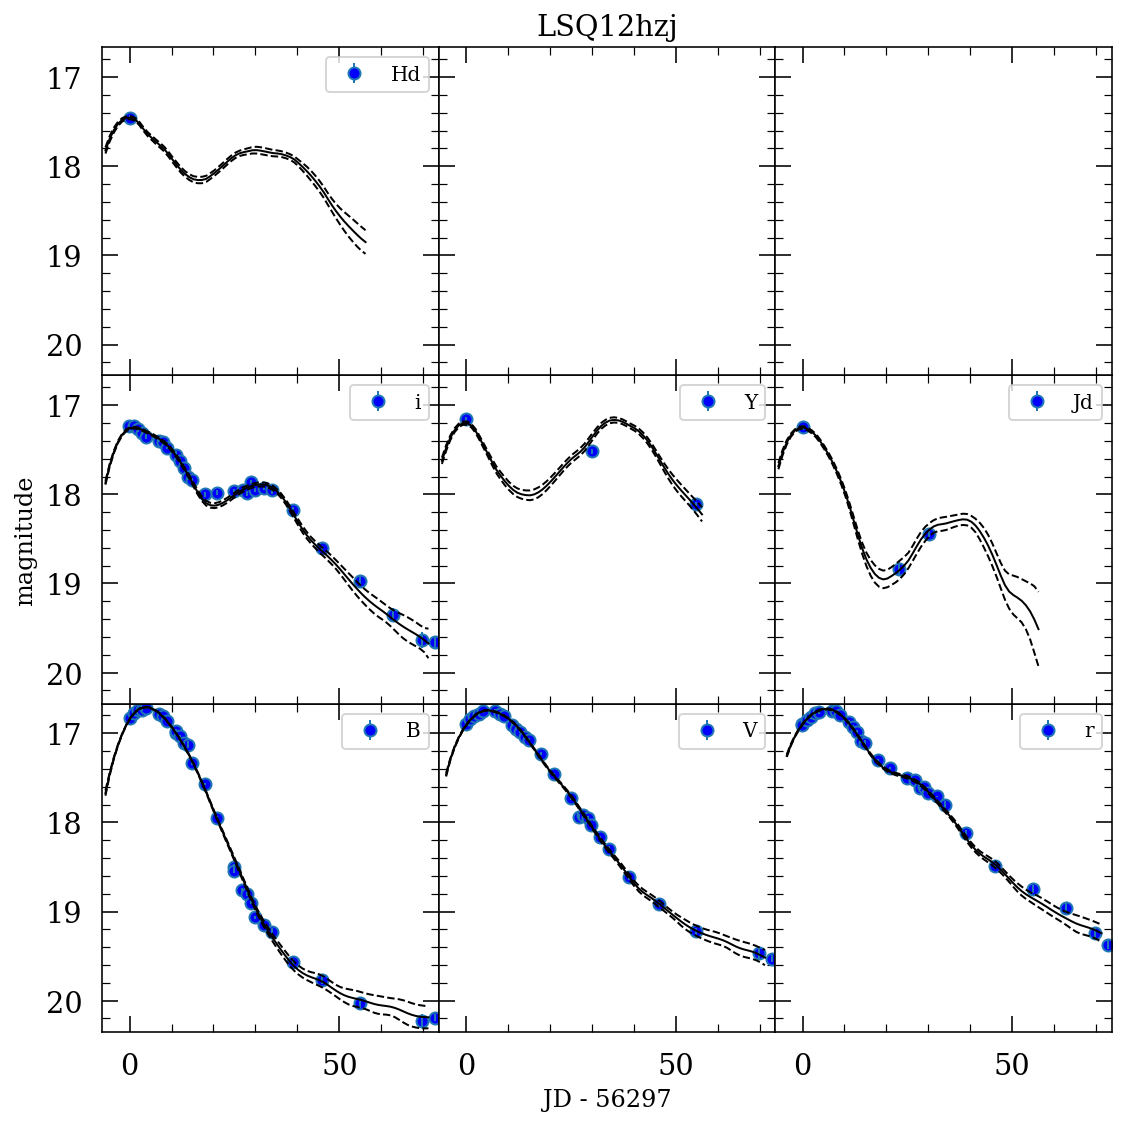

In [9]:
sn = snpy.get_sn('csp2/LSQ12hzj_snpy.txt')
sn.choose_model('max_model')
sn.fit()

___
## SNe with J and H bands

Note that there is also **Jrc2** band. We only consider SNe with J/Jrc2 AND H bands.

In [4]:
def extract_bands(sn_file):
    """Reads a SN file with SNooPy format and
    extracts the bands/filters used.
    
    Parameters
    ==========
    sn_file: str
        SN file in SNooPy format.

    Returns
    =======
    bands: list
        List of bands for a given SN.
    """
    
    bands = []
    with open(sn_file, 'r') as file:
        for line in file:
            if 'filter' in line:
                band = line.split()[-1]
                bands.append(band)
                
    return bands

In [23]:
sn_files = [file for file in glob.glob('csp2/*.txt')]

count = 0
with open('sne_wo_JorH_csp2.txt', 'w') as fout:
    for sn_file in sn_files:
        file_basename = sn_file.split('/')[-1]
        sn_name = file_basename.split('_')[0]
        
        bands = extract_bands(sn_file)

        if ('Jd' not in bands) or ('Hd' not in bands):
            print(f'{sn_name} does not have J or H bands: {bands}')
            bands_str = ''.join(band+'-' for band in bands)[:-1]
            fout.write(f'{sn_name} \t{bands_str}\n')
            count += 1
            
print(f'{count} SNe without J or H bands.')        

SN2011jt does not have J or H bands: ['B', 'g', 'i', 'r', 'u', 'V']
CSP13abm does not have J or H bands: ['B', 'g', 'i', 'r', 'u', 'V']
LSQ12cda does not have J or H bands: ['B', 'g', 'i', 'r', 'V', 'Y']
PTF14uo does not have J or H bands: ['i', 'Y', 'B', 'r', 'V']
SN2014at does not have J or H bands: ['B', 'g', 'i', 'r', 'u', 'V']
PTF13dwl does not have J or H bands: ['B', 'g', 'i', 'r', 'u', 'V', 'Y']
SN2012G does not have J or H bands: ['B', 'g', 'i', 'r', 'u', 'V']
SN2012hl does not have J or H bands: ['i', 'B', 'r', 'V']
PTF14aaf does not have J or H bands: ['i', 'r', 'B', 'V']
LSQ14mc does not have J or H bands: ['i', 'Y', 'B', 'r', 'V']
CSP14aaq does not have J or H bands: ['B', 'g', 'i', 'r', 'u', 'V']
ASAS15eb does not have J or H bands: ['B', 'g', 'i', 'r', 'u', 'V']
LSQ13dhj does not have J or H bands: ['i', 'Y', 'r', 'B', 'V']
PTF13ez does not have J or H bands: ['B', 'i', 'r', 'V', 'Y', 'Jrc2']
PS1-14rx does not have J or H bands: ['B', 'i', 'r', 'V', 'Y', 'Jrc2']
ASAS14kq

## SNe with coverage around optical peak

First we remove those SNe without J or H bands found above.
To have "good" coverage of the optical peak, we requiere to have at least one data point 2 days before B band maximum in observed B g, or r bands.

Fitting 130 SNe (85 from 215 CSP SNe removed using cuts)
ASAS15dd does not have coverage before B max
SN2013bc does not have coverage before B max
SN2013hn does not have coverage before B max
SN2013az does not have coverage before B max
ASAS15al does not have coverage before B max
PS1-14ra does not have coverage before B max


/home/tomas/anaconda3/lib/python3.6/site-packages/snpy/model.py:313: RuntimeWarning: overflow encountered in power
  cov_f = power(f*err/1.0857,2)


Unable to fit SN2014dn: Error:  Covariance Matrix is singular.  Either two or more parameters are degenerate or the model has become insensitive to one or more parameters.
CSP13N does not have coverage before B max
LSQ12fuk does not have coverage before B max
ASAS15fr does not have coverage before B max
LSQ13pf does not have coverage before B max
PTF11pra does not have coverage before B max
ASAS14jg does not have coverage before B max
SN2013ay does not have coverage before B max
LSQ11bk does not have coverage before B max
CSP13af does not have coverage before B max
Unable to fit CSP15aae: Error:  Covariance Matrix is singular.  Either two or more parameters are degenerate or the model has become insensitive to one or more parameters.
SN2013as does not have coverage before B max
SN2014Z does not have coverage before B max
SN2012ar does not have coverage before B max
SN2012aq does not have coverage before B max
ASAS15cb does not have coverage before B max
Unable to fit SN2014ba: Error:  

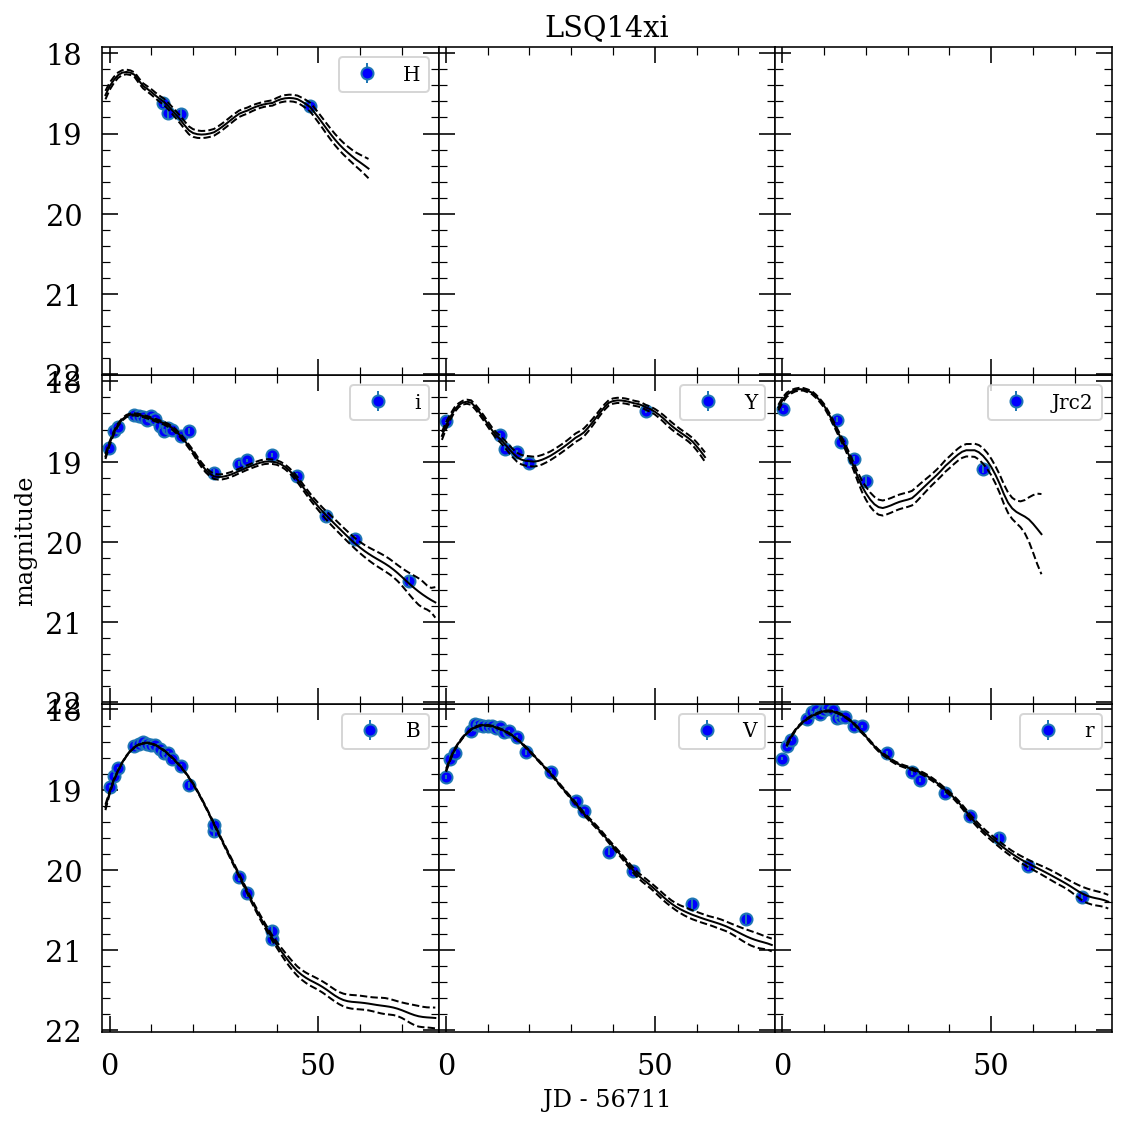

In [25]:
# SNe to remove
df = pd.read_csv('sne_wo_JorH_csp2.txt', names=['name', 'bands'], 
                                             delim_whitespace=True)
files2remove = [f'csp2/{name}_snpy.txt' for name in df.name.values]

sn_files = [file for file in glob.glob('csp2/*.txt') 
                                if file not in files2remove]
print((f'Fitting {len(sn_files)} SNe ({len(files2remove)} from'
       '{len(csp2_files)} CSP SNe removed using cuts)'))

count = 0
failed_count = 0
with open('sne_wo_opt_max_csp2.txt', 'w') as fout:
    for sn_file in sn_files:
        sn = snpy.import_lc(sn_file)
        
        # remove bands with no photometry (no idea why they are empty)
        for band in sn.allbands():
            band_mag = sn.data[band].magnitude
            if len(band_mag)==0:
                sn.data.pop(band)

        try:
            sn.choose_model(SNOOPY_MODEL)
            sn.fit()
        except Exception as message:
            print(f'Unable to fit {sn.name}: {message}')
            fout.write(f'{sn.name} \tfit-failed\n')
            failed_count += 1
            continue  # skip this SN

        # check if there is optical coverage before B max
        opt_peak_covered = False
        for band in sn.allbands():
            if band in ['B', 'g', 'r']:
                times = sn.data[band].get_t()  # observed epochs
                # we require data at least 2 days before optical peak
                if np.any(times<=-2):
                    opt_peak_covered = True
                    break

        # save the plots of the SNe w/o optical peak coverage
        if not opt_peak_covered:
            print(f'{sn.name} does not have coverage before B max')
            fout.write(f'{sn.name} \tno-peak-coverage\n')

            #sn.save(f'opt_cuts_fits/{sn.name}.snpy')
            sn.plot(outfile=f'opt_cuts_fits/{sn.name}.jpeg')
            count += 1
            
print(f'{count} SNe without optical peak coverage and {failed_count} with failed fits.')

There are two main errors when the fits fail:
        
1) `RuntimeError: Error:  Covariance Matrix is singular. Either two or more parameters are degenerate or the model has become insensitive to one or more parameters.`

2) `RuntimeError: All weights for filter H are zero. The fitter is in a part of parameter space where the model is not valid or there is no useful data.` (for different filters)

## SNe w/o NIR peak coverage

We need to remove those SNe without J or H bands + those without optical peak coverage first.

Fitting 96 SNe (119 from 215 CSP SNe removed using cuts)
LSQ11ot does not have coverage before NIR max
ASAS14hp does not have coverage before NIR max
ASAS15hf does not have coverage before NIR max
ASAS15gr does not have coverage before NIR max
CSP14adc does not have coverage before NIR max
PTF11pbp does not have coverage before NIR max
PS1-14xw does not have coverage before NIR max
SN2013fz does not have coverage before NIR max
ASAS14hr does not have coverage before NIR max
ASAS15cd does not have coverage before NIR max
ASAS15be does not have coverage before NIR max
SN2011jh does not have coverage before NIR max
KISS15n does not have coverage before NIR max
LSQ14jp does not have coverage before NIR max
LSQ14ghv does not have coverage before NIR max
SN2013E does not have coverage before NIR max
SN2013ad does not have coverage before NIR max
SN2013H does not have coverage before NIR max
ASAS15ga does not have coverage before NIR max
CSP14aal does not have coverage before NIR max
PS15sv d

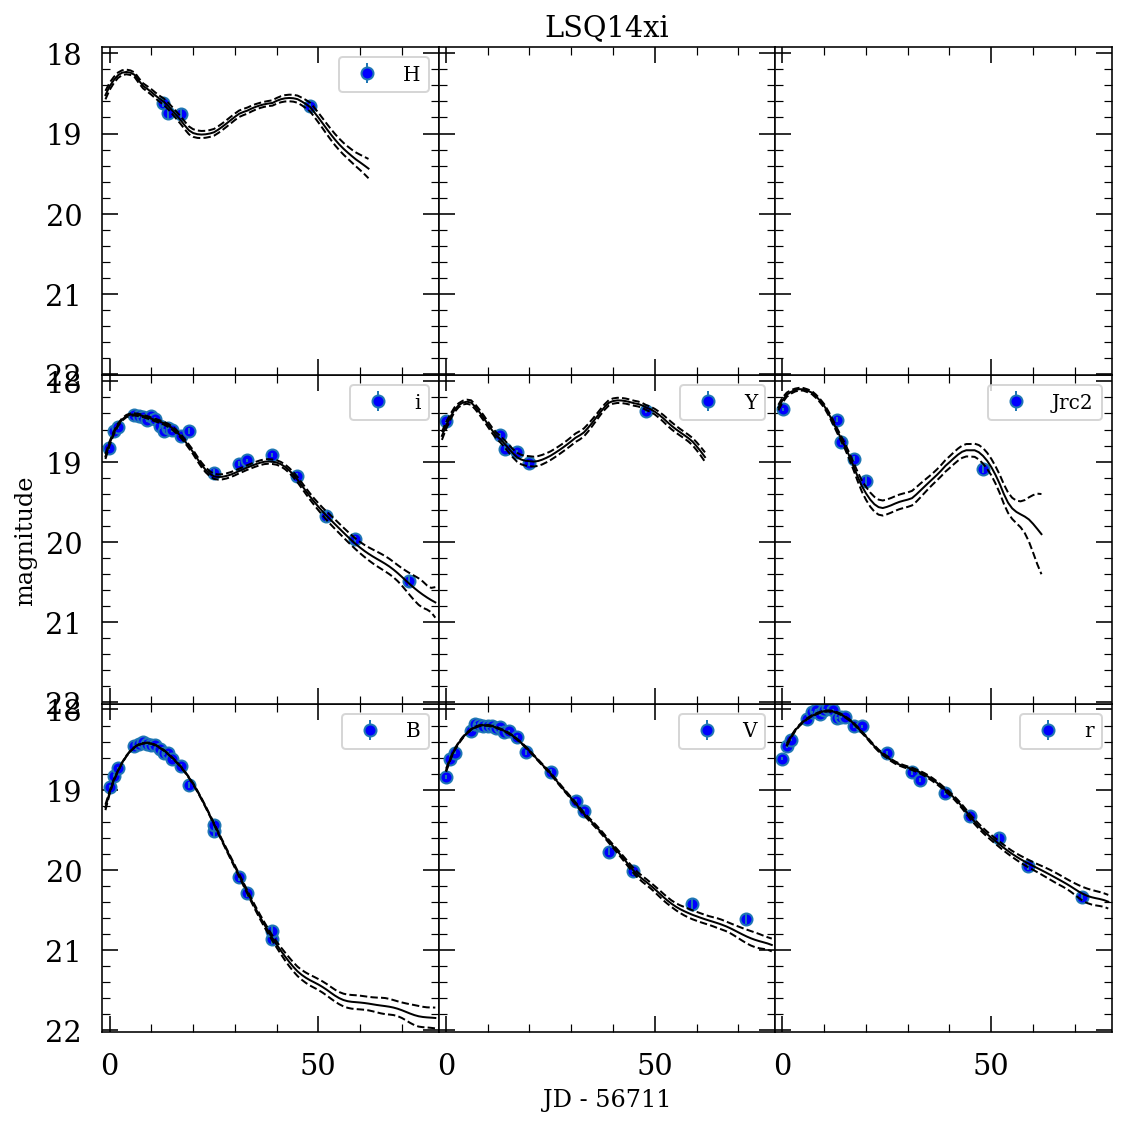

In [26]:
# SNe to remove
df1 = pd.read_csv('sne_wo_JorH_csp2.txt', names=['name', 'bands'], 
                                              delim_whitespace=True)
df2 = pd.read_csv('sne_wo_opt_max_csp2.txt', names=['name', 'comment'], 
                                                  delim_whitespace=True)
del_df = pd.concat([df1, df2])
files2remove = [f'csp2/{name}_snpy.txt' for name in list(del_df.name.values)]

sn_files = [file for file in glob.glob('csp2/*.txt') 
                                    if file not in files2remove]
print((f'Fitting {len(sn_files)} SNe ({len(files2remove)} from'
      '{len(csp2_files)} CSP SNe removed using cuts)'))

count = 0
failed_count = 0
with open('sne_wo_nir_max_csp2.txt', 'w') as fout:
    for sn_file in sn_files:
        sn = snpy.import_lc(sn_file)

        try:
            sn.choose_model(SNOOPY_MODEL)
            sn.fit()
        except Exception as message:
            print(f'Unable to fit {sn.name}: {message}')
            fout.write(f'{sn.name} \tfit-failed\n')
            failed_count += 1
            continue  # skip this SN

        # check if there is NIR coverage before NIR max
        nir_peak_covered = False
        for band in sn.allbands():
            if band in ['J', 'Jrc2', 'H']:
                
                model_times = np.arange(sn.Tmax-20, sn.Tmax+40)
                model_mag, _, mask = sn.model(band, model_times)
                model_phases  = model_times[mask]-sn.Tmax 
                model_mag = model_mag[mask]
                
                phases = sn.data[band].get_t()  # observed phases wrt Tmax
                first_epoch = phases[0]  # phase of first epoch
                
                peak_model_id = np.argmin(model_mag)
                peak_model_phase = model_phases[peak_model_id]

                if first_epoch<peak_model_phase:
                    nir_peak_covered = True
                    break

        # save the plots of the SNe w/o optical peak coverage
        if not nir_peak_covered:
            print(f'{sn.name} does not have coverage before NIR max')
            fout.write(f'{sn.name} \tno-peak-coverage\n')

            #sn.save(f'nir_cuts_fits/{sn.name}.snpy')
            sn.plot(outfile=f'nir_cuts_fits/{sn.name}.jpeg')
            count += 1

print(f'{count} SNe without NIR peak coverage and {failed_count} with failed fits.')

### save reference files

In [5]:
# SNe to remove
df1 = pd.read_csv('sne_wo_JorH_csp2.txt', names=['name', 'bands'], 
                                                  delim_whitespace=True)
df2 = pd.read_csv('sne_wo_opt_max_csp2.txt', names=['name', 'comment'], 
                                                  delim_whitespace=True)
df3 = pd.read_csv('sne_wo_nir_max_csp2.txt', names=['name', 'comment'], 
                                                  delim_whitespace=True)
del_df = pd.concat([df1, df2, df3])
files2remove = [f'csp2/{name}_snpy.txt' for name in list(del_df.name.values)]

sn_files = [file for file in glob.glob('csp2/*.txt') if file not in files2remove]
print((f'Fitting {len(sn_files)} SNe ({len(files2remove)} from'
      '{len(csp2_files)} CSP SNe removed using cuts)'))

# save reference files into an output file
with open('reference_files_csp2.txt', 'w') as outfile:
    for sn_file in sn_files:
        outfile.write(sn_file + '\n')

Fitting 51 SNe (164 from{len(csp2_files)} CSP SNe removed using cuts)
